In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
#import pandas as pd
#import xarray as xr
import math
import time
import os, glob
import re

AZI_HATPRO = np.tile(
    np.array((18.,  13. ,  8. ,  3., 358., 353., 348., 343., 338., 333., 328., 323., 318.,
     313., 308., 303. ,298., 293., 288., 283., 278., 273., 268., 263., 258., 253., 248.,
     243., 238., 233., 228., 223., 218., 213., 208., 203., 198., 193., 188., 183., 178.,
     173., 168., 163., 158., 153., 148., 143., 138., 133., 128., 123., 118., 113., 108.,
     103.,  98.,  93.,  88.,  83.,  78.,  73.,  68.,  63., 58.,  53.,  48.,  43.,  38.,
     33.,  28., 23.)),
    (48, 1)
)

In [9]:
ds = xr.open_dataset('./sups_nya_mwr00_l2_prw_v00_20201001000028.nc')
df = ds.to_dataframe()

In [15]:
print(df)

                                                           time_bnds  \
n_ret nv time                                                          
0     0  2020-10-01 00:00:28.000008960 2020-10-01 00:00:28.000008960   
         2020-10-01 00:00:30.999992832 2020-10-01 00:00:30.999992832   
         2020-10-01 00:00:34.000016640 2020-10-01 00:00:34.000016640   
         2020-10-01 00:00:37.000000512 2020-10-01 00:00:37.000000512   
         2020-10-01 00:00:38.999989504 2020-10-01 00:00:38.999989504   
...                                                              ...   
85    1  2020-10-01 23:59:52.999997696 2020-10-01 23:59:53.999992320   
         2020-10-01 23:59:53.999992320 2020-10-01 23:59:54.999986944   
         2020-10-01 23:59:54.999986944 2020-10-01 23:59:56.000021760   
         2020-10-01 23:59:56.000021760 2020-10-01 23:59:57.000016128   
         2020-10-01 23:59:57.000016128 2020-10-01 23:59:58.000011008   

                                              lat     lon  zsl 

In [16]:
iwv = df[['time_bnds','ele','azi','prw_off_zenith']]

In [17]:
print(iwv)

                                                           time_bnds  \
n_ret nv time                                                          
0     0  2020-10-01 00:00:28.000008960 2020-10-01 00:00:28.000008960   
         2020-10-01 00:00:30.999992832 2020-10-01 00:00:30.999992832   
         2020-10-01 00:00:34.000016640 2020-10-01 00:00:34.000016640   
         2020-10-01 00:00:37.000000512 2020-10-01 00:00:37.000000512   
         2020-10-01 00:00:38.999989504 2020-10-01 00:00:38.999989504   
...                                                              ...   
85    1  2020-10-01 23:59:52.999997696 2020-10-01 23:59:53.999992320   
         2020-10-01 23:59:53.999992320 2020-10-01 23:59:54.999986944   
         2020-10-01 23:59:54.999986944 2020-10-01 23:59:56.000021760   
         2020-10-01 23:59:56.000021760 2020-10-01 23:59:57.000016128   
         2020-10-01 23:59:57.000016128 2020-10-01 23:59:58.000011008   

                                              ele    azi  prw_o

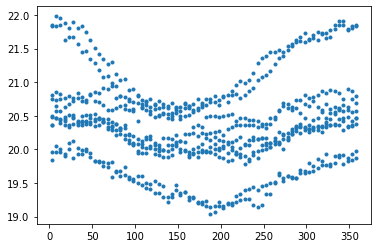

In [21]:
plt.plot(iwv['azi'][:5000],iwv['prw_off_zenith'][:5000],'.')

In [47]:
iwv.dropna()

time_bnds  \
n_ret nv time                                                          
0     0  2020-10-01 00:00:28.000008960 2020-10-01 00:00:28.000008960   
         2020-10-01 00:00:30.999992832 2020-10-01 00:00:30.999992832   
         2020-10-01 00:00:34.000016640 2020-10-01 00:00:34.000016640   
         2020-10-01 00:00:37.000000512 2020-10-01 00:00:37.000000512   
         2020-10-01 00:00:38.999989504 2020-10-01 00:00:38.999989504   
...                                                              ...   
85    1  2020-10-01 23:37:07.000004096 2020-10-01 23:37:07.999998464   
         2020-10-01 23:37:08.999993344 2020-10-01 23:37:09.999987968   
         2020-10-01 23:37:12.000017152 2020-10-01 23:37:13.000011776   
         2020-10-01 23:37:15.000001024 2020-10-01 23:37:15.999995392   
         2020-10-01 23:37:18.000024832 2020-10-01 23:37:19.000019456   

                                              ele    azi  prw_off_zenith  
n_ret nv time                                                             
0     0  2020-10-01 00:00:28.000008960  29.700001   18.0       19.935017  
         2020-10-01 00:00:30.999992832  29.700195   13.0       19.965477  
         2020-10-01 00:00:34.000016640  29.700195    8.0       20.044697  
         2020-10-01 00:00:37.000000512  29.700195    3.0       19.954399  
         2020-10-01 00:00:38.999989504  29.699219  358.0       19.981924  
...                                           ...    ...             ...  
85    1  2020-10-01 23:37:07.000004096  29.687500   43.0       12.734596  
         2020-10-01 23:37:08.999993344  29.687500   38.0       12.734186  
         2020-10-01 23:37:12.000017152  29.687500   33.0       12.728433  
         2020-10-01 23:37:15.000001024  29.687500   28.0       12.712514  
         2020-10-01 23:37:18.000024832  29.687500   23.0       12.769464  

[1188692 rows x 4 columns]

In [54]:
#ahhhhhhhhh
#neuer versuch

In [17]:
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20201001000028.nc')
iwv_data.variables.keys()
#t = np.array(iwv_data['time'])
#prw = np.array(iwv_data['prw'])
#azi = np.array(iwv_data['azi'])
#elevation = np.array(iwv_data['ele'])
#prw_offzen = np.array(iwv_data['prw_off_zenith'])

dict_keys(['time', 'time_bnds', 'lat', 'lon', 'zsl', 'azi', 'ele', 'ele_ret', 'prw', 'prw_offset', 'prw_off_zenith', 'prw_off_zenith_offset', 'prw_err', 'flag'])

In [ ]:
data_list = list(zip(t,elevation,prw_offzen,azi)) # tuple with data time[0], elevation[1], prw_off_zenith[2], azimuth[3]
scan_iwv = [[]]
cutoff_ele = 30
for i in range(elevation.size):
    if elevation[i] > cutoff_ele:
        scan_iwv.append([])

    if math.isnan(prw_offzen[i]):
        scan_iwv[-1].append((data_list[i][0],data_list[i][1],-1,data_list[i][3]))
    else:
        scan_iwv[-1].append(data_list[i])
        iwv_values = [[]]
iwv_time = [[]]
iwv_ele = [[]]
iwv_azi = [[]]
last_val = -1
for i in range(len(scan_iwv)):
    for j in range(len(scan_iwv[i])):
        if scan_iwv[i][j][2] != -1:
            if last_val == -1:
                iwv_values.append([])
                iwv_time.append([])
                iwv_ele.append([])
                iwv_azi.append([])
            iwv_airmass_corr = np.sin(np.deg2rad(scan_iwv[i][j][1]))*scan_iwv[i][j][2]
            # air mass corrected IWV = sin( elevation angle ) * prw_off_zenith 
            #iwv_values[-1].append(scan_iwv[i][j][2])
            iwv_values[-1].append(iwv_airmass_corr)
            result_time = time.gmtime(scan_iwv[i][j][0])
            iwv_time[-1].append(result_time.tm_hour + (result_time.tm_min/60))
            iwv_ele[-1].append(scan_iwv[i][j][1])
            iwv_azi[-1].append(scan_iwv[i][j][3])
        last_val = scan_iwv[i][j][2]
return iwv_values,iwv_time,iwv_ele,iwv_azi   

In [44]:
def offzen_data(t,azi,prw_offzen,elevation,flag):
    """
    Written by Lennéa Hayo, 2020-11-13
    
    Organizes data, collected at an elevation angle of ca. 30 (off zenith), on a fixed grid of 48x72. 
    Every scan is made up of two rounds of data, which are meaned and air mass corrected.
    
    Parameters: 
        t: time data in seconds since 1970-01-01 00:00:00 UTC
        azi: sensor azimuth angle (0=North, 90=East, 180=South, 270=West)
        prw_offzen: off zenith path integrated water vapor
        elevation: retrieval elevation angle
        
    Returns:
        azimuth: sensor azimuth angle (48x72)
        time_ofday: time when data was taken in (hours + portion of minutes)
        airmass_corr: air mass corrected data
    """
    data_list = list(zip(t,elevation,prw_offzen,azi,flag))
    azi_pre = np.zeros((48,72))
    airmass_corr = np.full((48,72),np.nan)
    time_ofday = np.stack([np.full(72, x) for x in np.array(range(48))/2])
    
    if all(i > 30 for i in elevation):
        raise Exception('Dataset does not include scans')

    i = 0
    j = 0
    line_advanced = False
    last_time = data_list[0][0]
    print_warning = True

    for data in data_list:
        result_time = time.gmtime(data[0])

        if data[1] > 30:
            last_time = data[0]
            if line_advanced: 
                continue
            i += 1
            j = 0
            line_advanced = True
            continue
        else:    
            line_advanced = False

        if data[0] - last_time > 20*60 or (i==0 and j==0 and (result_time.tm_hour + (result_time.tm_min/60))!=0.):
            while (result_time.tm_hour + (result_time.tm_min/60))*2 - 1 > i:
                i += 1
            j = 0
            
        #organizing data onto 48x72 grid and taking the mean of two scans
        if j < 72:
            azi_pre[i,j] = data[3]
            time_ofday[i,j] = result_time.tm_hour + (result_time.tm_min/60)
            if data[4] & 0b1000000:
                airmass_corr[i,j] = np.nan
            else:    
                airmass_corr[i,j] = np.sin(np.deg2rad(data[1]))*data[2]
        elif j < 144:
            if data[4] & 0b1000000:
                airmass_corr[i,j-72] = np.nan
            else:
                airmass_corr[i,j-72] = (np.sin(np.deg2rad(data[1]))*data[2] + airmass_corr[i,j-72])/2
        elif print_warning:
            print('Warning: array too long, data taken out')
            print_warning=False
            airmass_corr[i] = np.tile(np.nan,(1,72))
        j += 1
        if azi_pre[i].all() != 0 and 'azimuth' not in locals():
            azimuth = np.tile(azi_pre[i],(48,1)) 
    
    #safety, should not arise
    if not 'azimuth' in locals():
        raise Exception('Azimuth not defined. No scan data available')
    return azimuth, time_ofday, airmass_corr  

In [5]:
azimuth, time_ofday, airmass_corr = offzen_data(t,azi,prw_offzen,elevation)
azimuth, airmass_corr = azi_sort(azimuth, airmass_corr)

NameError: name 't' is not defined

In [4]:
def az_vs_time(time_ofday,azimuth,airmass_corr,filename):
    """
    Creates a plot over the whole day. Similar to Quicklook browser
    """
    xticks = [0,90,180,270,360]
    xlabels = ['N','E', 'S', 'W', 'N']

    plt.figure(figsize=(6.4,8))
    masked_iwv = np.ma.masked_where(np.isnan(airmass_corr),airmass_corr)
    plt.pcolormesh(azimuth,time_ofday,masked_iwv,cmap='viridis')
    plt.xticks(xticks,xlabels)
    #plt.yticks(yticks)
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='white')
    plt.xlabel('Azimuth angle')
    plt.ylabel('Time of day [UTC]')
    plt.colorbar(label=r'IWV (airmass-corrected)')
    plt.savefig(filename)

In [5]:
def azi_sort(azimuth, airmass_corr):
    """
    Sorts the azimuth and corresponding IWV data, so that the Azimuth increases from 0-360.
    
    Parameters:
        azimuth: sensor azimuth angle (48x72)
        airmass_corr: airmass corrected data 
        
    Returns:
        iwv_azi_sort: sorted sensor azimuth angle
        airmass_corr: equally sorted airmass corrected data
    """
    iwv_azi_sort = np.zeros(shape=(48,72))
    for i in range(len(azimuth)):
        zipped_lists = zip(azimuth[i], airmass_corr[i])
        sorted_pairs = sorted(zipped_lists)

        tuples = zip(*sorted_pairs)
        iwv_azi_sort[i], airmass_corr[i] = [ list(single) for single in  tuples]
        
    return iwv_azi_sort, airmass_corr

In [6]:
def dev_mean(time_ofday,azimuth,airmass_corr,filename,titledate):
    """
    Written by Lennéa Hayo, 2020-11-13
    
    Plots the deviation from the mean over each scan. Creates a plot for the entire day.
    
    Parameters:
        time_ofday: time when data was taken in (hours + portion of minutes)
        azimuth: sensor azimuth angle (48x72)
        airmass_corr: air mass corrected data
        filename:
        
    Returns:    
        iwv_dev_mean: deviation from mean of each scan as array 
    """
    iwv_val_mean = np.nanmean(airmass_corr,axis=1)
    iwv_val_mean = np.reshape(iwv_val_mean,(48,1))

    iwv_dev_mean = [[]] #gives deviation of iwv values from mean 
    for i in range(len(airmass_corr)):
        iwv_dev_mean.append([])
        for j in range(len(airmass_corr[i])):
            iwv_dev_mean[i].append(float(airmass_corr[i][j] - iwv_val_mean[i]))

    #find which is higher, min or max, then make the bigger number vmin and vmax in plot 
    max_dev = []
    min_dev = []
    for i in range(len(iwv_dev_mean)-1):
        max_dev.append(max(iwv_dev_mean[i]))
        min_dev.append(min(iwv_dev_mean[i]))
    if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
        abs_highest = abs(np.nanmax(max_dev))
    else:
        abs_highest = abs(np.nanmin(min_dev))
    #print(abs_highest)        


    xticks = [0,90,180,270,360]
    xlabels = ['N','E', 'S', 'W', 'N']

    plt.figure(figsize=(6.4,8))
    plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
    plt.xticks(xticks,xlabels)           
    plt.xlabel('Azimuth angle')
    plt.ylabel('Time of day [UTC]')
    plt.title('{}'.format(titledate))
    plt.rc('axes', labelsize=12) 
    #add date on top and in general make fonds bit bigger
    plt.colorbar(label=r'deviation from the IWV mean per timestep in (kg m$^{-2}$)')
    plt.savefig(filename)
    
    return iwv_dev_mean

In [2]:
iwv_dev_mean = dev_mean(time_ofday,azimuth,airmass_corr)

NameError: name 'time_ofday' is not defined

Text(0, 0.5, 'Mean IWV (kg m$^{-2}$) for every Azimuth over 24h')

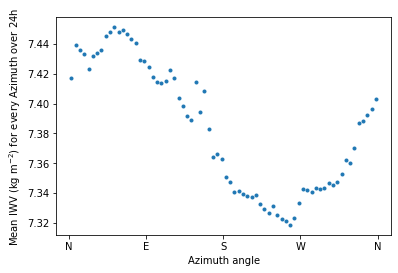

In [106]:
#vertical mean: mean for every azi angle
iwv_mean_vert = np.mean(airmass_corr,axis=0)

xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']

plt.plot(azimuth[1],iwv_mean_vert,'.')
plt.xticks(xticks,xlabels)           
plt.xlabel('Azimuth angle')
plt.ylabel(r'Mean IWV (kg m$^{-2}$) for every Azimuth over 24h')

Text(0, 0.5, 'Mean of deviation of mean for every Azimuth over 24h')

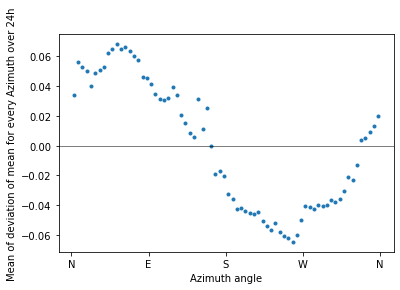

In [127]:
vertmean_dev_mean = np.mean(iwv_dev_mean[:-1], axis=0)
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']

plt.plot(azimuth[1],vertmean_dev_mean,'.')
plt.axhline(y=0,linewidth=.5, color='k')
plt.xticks(xticks,xlabels)           
plt.xlabel('Azimuth angle')
plt.ylabel(r'Mean of deviation of mean for every Azimuth over 24h')

In [38]:
def daily_devmean_scan(filename):
    """
    Written by Lennéa Hayo, 2020-11-20
    
    Creates plot daily deveation from mean plot.
    
    Parameters: 
        filename: 'path to file and file.nc' 
    
    """
    dir_path = os.path.dirname(os.path.realpath(filename))
    savefilename = os.path.basename(os.path.realpath(filename))
    
    pattern = re.compile('v00_(\d{8})')
    titledate = pattern.findall(savefilename)[0]
    savefilename = '{}/{}_devmean.png'.format(dir_path,titledate)
    iwv_data = Dataset(filename)
    iwv_data.variables.keys()
    t = np.array(iwv_data['time'])
    azi = np.array(iwv_data['azi'])
    elevation = np.array(iwv_data['ele'])
    prw_offzen = np.array(iwv_data['prw_off_zenith'])
    flag = np.array(iwv_data['flag'])
    
    azimuth, time_ofday, airmass_corr = offzen_data(t,azi,prw_offzen,elevation,flag)
    azimuth, airmass_corr = azi_sort(azimuth, airmass_corr)
    
    #plotting function
    dev_mean(time_ofday,azimuth,airmass_corr,savefilename,titledate)

[[23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 ...
 [23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]]


<ipython-input-30-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


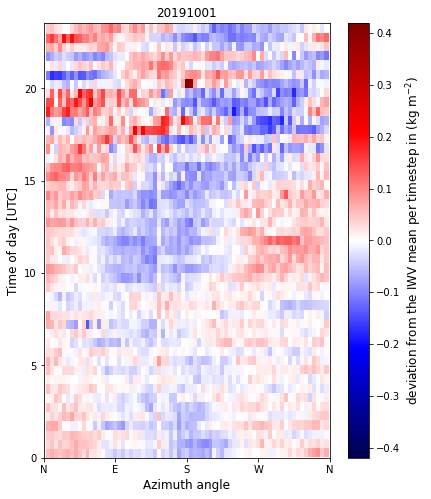

In [72]:
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20191001000028.nc')

## what happens for days with missing data

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [18. 13.  8. ... 33. 28. 23.]
 [18. 13.  8. ... 33. 28. 23.]
 [18. 13.  8. ... 33. 28. 23.]]


<ipython-input-30-3d4671b5a319>:16: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-30-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


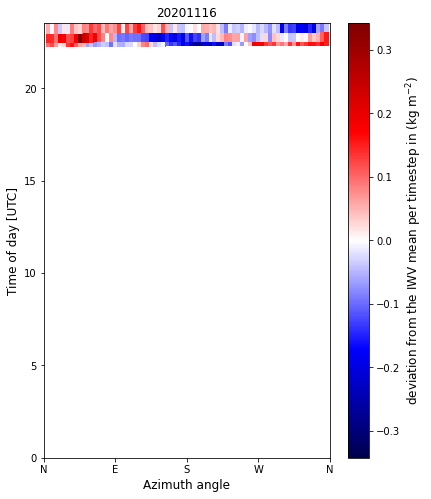

In [86]:
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20201116221738.nc')

<ipython-input-97-3d4671b5a319>:16: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-97-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


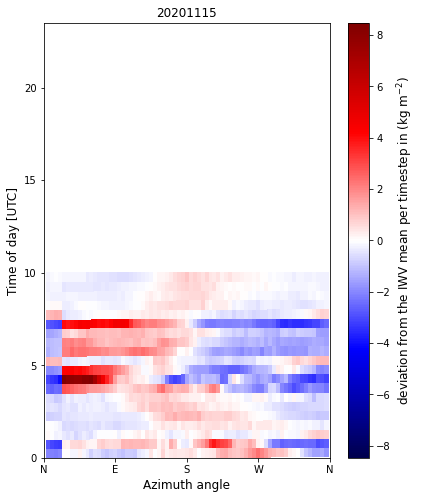

In [99]:
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20201115000028.nc')

[[23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 ...
 [23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]]


<ipython-input-30-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


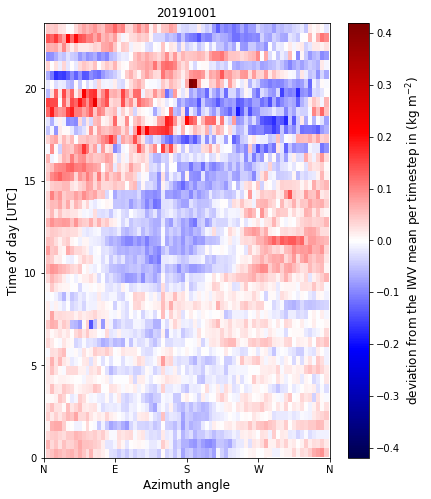

In [88]:
#sups_nya_mwr00_l2_prw_v00_20191001000028.nc
#sups_nya_mwr00_l2_prw_v00_20201115000028.nc
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20191001000028.nc')

[[18. 13.  8. ... 33. 28. 23.]
 [18. 13.  8. ... 33. 28. 23.]
 [18. 13.  8. ... 33. 28. 23.]
 ...
 [18. 13.  8. ... 33. 28. 23.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


<ipython-input-30-3d4671b5a319>:16: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-30-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


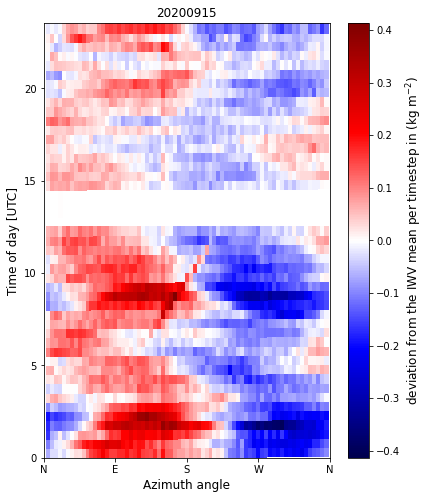

In [89]:
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20200915000029.nc')
#sups_nya_mwr00_l2_prw_v00_20200915000029.nc

[[23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 ...
 [23. 18. 13. ... 38. 33. 28.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


<ipython-input-30-3d4671b5a319>:16: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-30-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


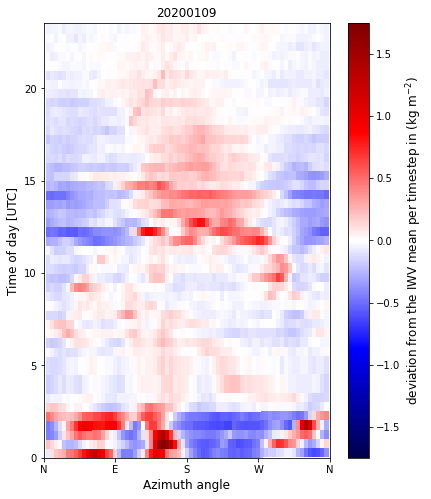

In [90]:
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20200109000028.nc')

[[23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 [23. 18. 13. ... 38. 33. 28.]
 ...
 [23. 18. 13. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


<ipython-input-30-3d4671b5a319>:16: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-30-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


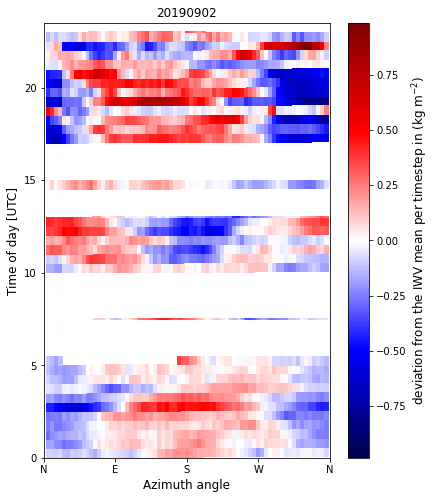

In [78]:
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20190902000029.nc')

## script crashed

In [7]:
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20190903002344.nc')
#iwv_data.variables.keys()
t = np.array(iwv_data['time'])
prw = np.array(iwv_data['prw'])
azi = np.array(iwv_data['azi'])
elevation = np.array(iwv_data['ele'])
prw_offzen = np.array(iwv_data['prw_off_zenith'])

In [24]:
data_list = list(zip(t,elevation,prw_offzen,azi))
#azimuth = np.zeros((48,72))
#azi_first = np.array( (23.,18.,  13. ,  8. ,  3., 358., 353., 348., 343., 338., 333., 328., 323., 318.,
 #313., 308., 303. ,298., 293., 288., 283., 278., 273., 268., 263., 258., 253., 248.,
 #243., 238., 233., 228., 223., 218., 213., 208., 203., 198., 193., 188., 183., 178.,
 #173., 168., 163., 158., 153., 148., 143., 138., 133., 128., 123., 118., 113., 108.,
 #103.,  98.,  93.,  88.,  83.,  78.,  73.,  68.,  63., 58.,  53.,  48.,  43.,  38.,
 # 33.,  28.))
#azi_compl = np.tile(azi_first, (48, 1))
airmass_corr = np.full((48,72),np.nan)
time_ofday = np.stack([np.full(72, x) for x in np.array(range(48))/2])
#time_ofday_compl


i = 0
j = 0
line_advanced = False
last_time = data_list[0][0]
print_warning = True


for data in data_list:
    result_time = time.gmtime(data[0])

    if data[1] > 30:
        last_time = data[0]
        if line_advanced: 
            continue
        i += 1
        j = 0
        line_advanced = True
        continue
    else:    
        line_advanced = False
   
    if data[0] - last_time > 15*60 or (i==0 and j==0 and (result_time.tm_hour + (result_time.tm_min/60))!=0.):
        while (result_time.tm_hour + (result_time.tm_min/60))*2 - 1 > i:
            i += 1
        j = 0

    #organizing data onto 48x72 grid and taking the mean of two scans
    if j < 72:
        airmass_corr[i,j] = np.sin(np.deg2rad(data[1]))*data[2]
        time_ofday[i,j] = result_time.tm_hour + (result_time.tm_min/60) 
    elif j < 144:
        airmass_corr[i,j-72] = (np.sin(np.deg2rad(data[1]))*data[2] + airmass_corr[i,j-72])/2
    elif print_warning:
        print('Warning: array too long, data taken out')
        print_warning=False
        
    j += 1

for i in range(len(airmass_corr)):
    print(len(airmass_corr[i]))
    

72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72


In [61]:
data_list = list(zip(t,elevation,prw_offzen,azi)) # tuple with data time[0], elevation[1], prw_off_zenith[2], azimuth[3]
scan_iwv = [[]]
cutoff_ele = 30
for i in range(elevation.size):
    if elevation[i] > cutoff_ele:
        scan_iwv.append([])

    if math.isnan(prw_offzen[i]) or prw_offzen[i]<0:
        scan_iwv[-1].append((data_list[i][0],data_list[i][1],-1,data_list[i][3]))
    else:
        scan_iwv[-1].append(data_list[i])
        iwv_values = [[]]
iwv_time = [[]]
iwv_ele = [[]]
iwv_azi = [[]]
last_val = -1
for i in range(len(scan_iwv)):
    for j in range(len(scan_iwv[i])):
        if scan_iwv[i][j][2] != -1:
            if last_val == -1:
                iwv_values.append([])
                iwv_time.append([])
                iwv_ele.append([])
                iwv_azi.append([])
            iwv_airmass_corr = np.sin(np.deg2rad(scan_iwv[i][j][1]))*scan_iwv[i][j][2]
            # air mass corrected IWV = sin( elevation angle ) * prw_off_zenith 
            #iwv_values[-1].append(scan_iwv[i][j][2])
            iwv_values[-1].append(iwv_airmass_corr)
            result_time = time.gmtime(scan_iwv[i][j][0])
            iwv_time[-1].append(result_time.tm_hour + (result_time.tm_min/60))
            iwv_ele[-1].append(scan_iwv[i][j][1])
            iwv_azi[-1].append(scan_iwv[i][j][3])
        last_val = scan_iwv[i][j][2]
        
for i in range(len(iwv_values)):
    print(len(iwv_values[i]))   
#print(iwv_azi[1])    
    

0
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
[18.0, 13.0, 8.0, 3.0, 358.0, 353.0, 348.0, 343.0, 338.0, 333.0, 328.0, 323.0, 318.0, 313.0, 308.0, 303.0, 298.0, 293.0, 288.0, 283.0, 278.0, 273.0, 268.0, 263.0, 258.0, 253.0, 248.0, 243.0, 238.0, 233.0, 228.0, 223.0, 218.0, 213.0, 208.0, 203.0, 198.0, 193.0, 188.0, 183.0, 178.0, 173.0, 168.0, 163.0, 158.0, 153.0, 148.0, 143.0, 138.0, 133.0, 128.0, 123.0, 118.0, 113.0, 108.0, 103.0, 98.0, 93.0, 88.0, 83.0, 78.0, 73.0, 68.0, 63.0, 58.0, 53.0, 48.0, 43.0, 38.0, 33.0, 28.0, 23.0, 18.0, 13.0, 8.0, 3.0, 358.0, 353.0, 348.0, 343.0, 338.0, 333.0, 328.0, 323.0, 318.0, 313.0, 308.0, 303.0, 298.0, 293.0, 288.0, 283.0, 278.0, 273.0, 268.0, 263.0, 258.0, 253.0, 248.0, 243.0, 238.0, 233.0, 228.0, 223.0, 218.0, 213.0, 208.0, 203.0, 198.0, 193.0, 188.0, 183.0, 178.0, 173.0, 168.0, 163.0, 158.0, 153.0, 148.0, 143.0, 138.0, 133.0, 128.0, 123.0, 118.0, 113.0, 108.0, 103.0, 98.0, 93.0, 88.0, 83.0, 78.0, 73.0, 68.0, 63.0, 5

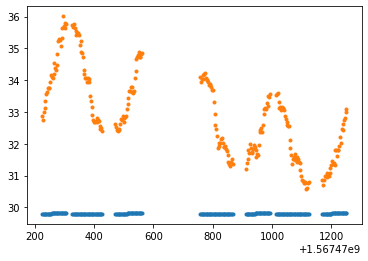

In [19]:
plt.plot(t[:247],elevation[:247],'.')
#plt.plot(t[:5000],prw[:5000],'.')
plt.plot(t[:247],prw_offzen[:247],'.')

<ipython-input-97-3d4671b5a319>:16: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-97-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


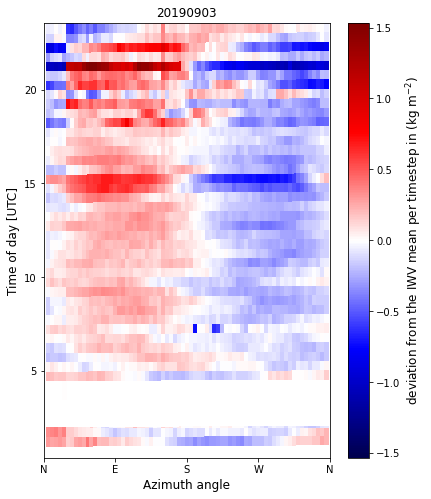

In [115]:
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20190903002344.nc')

<ipython-input-97-3d4671b5a319>:16: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-97-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


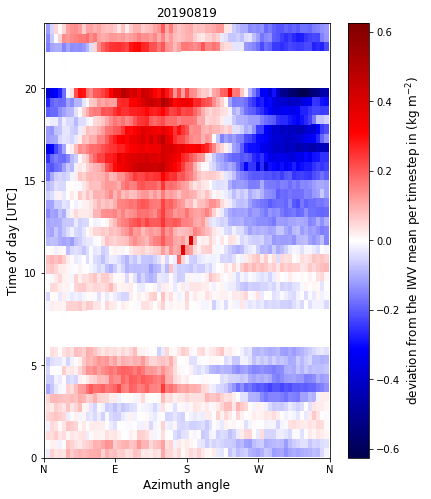

In [101]:
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20190819000029.nc')

<ipython-input-97-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


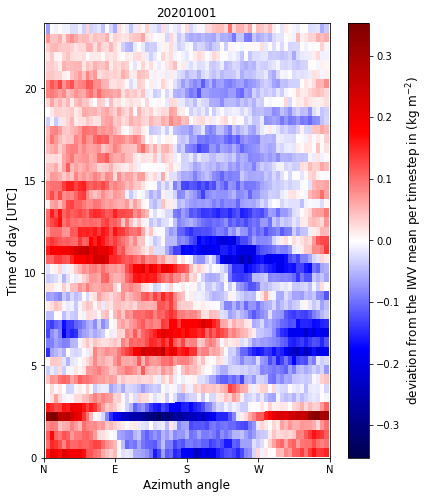

In [102]:
#test with already plotted data, appears to work
daily_devmean_scan('./sups_nya_mwr00_l2_prw_v00_20201001000028.nc')

## monthlymean and std

In [190]:
#sequence = '*202001**.nc'
#directory = '/Users/Lennea/Documents/Uni/SHK/Rosa'
#for my computer
def monthly_devmean(sequence,directory): 
    
    #generate file with all files containing sequence
    files = []
    os.chdir(directory)
    for file in glob.glob(sequence):
        files.append(file)
    files = np.array(files)
    
    amc_month = np.full((1,72),np.nan)
    #generate data for every day
    for file in files: 
        iwv_data = Dataset(file)
        iwv_data.variables.keys()
        t = np.array(iwv_data['time'])
        azi = np.array(iwv_data['azi'])
        elevation = np.array(iwv_data['ele'])
        prw_offzen = np.array(iwv_data['prw_off_zenith'])
        
        azimuth, time_ofday, airmass_corr = offzen_data(t,azi,prw_offzen,elevation)
        azimuth, airmass_corr = azi_sort(azimuth, airmass_corr)
        iwv_dev_mean = dev_mean_data(time_ofday, azimuth, airmass_corr)
        amc_month = np.vstack((amc_month,iwv_dev_mean[:-1]))    
    
    monthly_mean = np.nanmean(amc_month,axis=0)
    amc_devmean_std = np.nanstd(amc_month,axis=0)
    return azimuth, monthly_mean, amc_devmean_std  

In [ ]:
#for running on institute server
#sequence: '*prw**.nc'
#directory: '/data/obs/site/nya/nyhat/l2/2020/02'
def monthly_devmean(path): 
    
    #generate file with all files containing sequence
    files = []
    sequence = './**/*prw*.nc'
    os.chdir(path)
    for file in glob.glob(sequence, recursive=True):
        files.append(os.path.realpath(file))
    files = np.array(files)
    print(files)
    
    amc_month = np.full((1,72),np.nan)
    #generate data for every day
    for file in files: 
        iwv_data = Dataset(file)
        iwv_data.variables.keys()
        t = np.array(iwv_data['time'])
        azi = np.array(iwv_data['azi'])
        elevation = np.array(iwv_data['ele'])
        prw_offzen = np.array(iwv_data['prw_off_zenith'])
        
        azimuth, time_ofday, airmass_corr = offzen_data(t,azi,prw_offzen,elevation)
        azimuth, airmass_corr = azi_sort(azimuth, airmass_corr)
        iwv_dev_mean = dev_mean_data(time_ofday, azimuth, airmass_corr)
        amc_month = np.vstack((amc_month,iwv_dev_mean[:-1]))    
    
    monthly_mean = np.nanmean(amc_month,axis=0)
    amc_devmean_std = np.nanstd(amc_month,axis=0)
    return azimuth, monthly_mean, amc_devmean_std  

In [191]:
sequence = '*202001**.nc'
directory = '/Users/Lennea/Documents/Uni/SHK/Rosa'
azimuth, monthly_mean, amc_devmean_std = monthly_devmean(sequence,directory)

<ipython-input-142-e9ddd95258c5>:2: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)


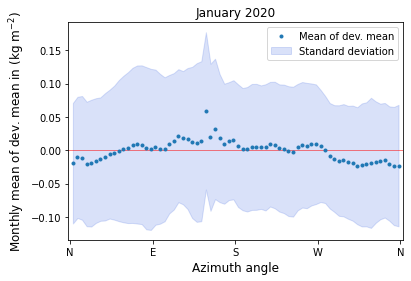

In [226]:
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']

plt.figure()
#plt.errorbar(azimuth[0], monthly_mean, yerr=amc_devmean_std,fmt='.', elinewidth=.5)
plt.axhline(y=0,linewidth=.5, color='r')
plt.plot(azimuth[0], monthly_mean, '.',label='Mean of dev. mean')
plt.fill_between(azimuth[0], monthly_mean + amc_devmean_std, monthly_mean - amc_devmean_std,
                 color='royalblue', alpha=0.2,label='Standard deviation')
plt.xticks(xticks,xlabels) 
plt.xlim(min(azimuth[0])-5,max(azimuth[0])+5)
plt.xlabel('Azimuth angle')
plt.ylabel(r'Monthly mean of dev. mean in (kg m$^{-2}$)')
plt.title('January 2020')
plt.legend(loc='best')
#plt.savefig('./mean_jan_2020.png')

In [141]:
sequence = '*202001**.nc'
directory = '/Users/Lennea/Documents/Uni/SHK/Rosa'
files = []
os.chdir(directory)
for file in glob.glob(sequence):
    files.append(file)
files = np.array(files)  

['sups_nya_mwr00_l2_prw_v00_20200105000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200126000029.nc'
 'sups_nya_mwr00_l2_prw_v00_20200113000029.nc'
 'sups_nya_mwr00_l2_prw_v00_20200112000029.nc'
 'sups_nya_mwr00_l2_prw_v00_20200130000029.nc'
 'sups_nya_mwr00_l2_prw_v00_20200119000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200118000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200104000029.nc'
 'sups_nya_mwr00_l2_prw_v00_20200127000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200114000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200115000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200131001905.nc'
 'sups_nya_mwr00_l2_prw_v00_20200103000029.nc'
 'sups_nya_mwr00_l2_prw_v00_20200102000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200120000029.nc'
 'sups_nya_mwr00_l2_prw_v00_20200109000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200108000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200107000029.nc'
 'sups_nya_mwr00_l2_prw_v00_20200110000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200111000028.nc'
 'sups_nya_mwr00_l2_prw_v00_20200106000028.nc'
 'sups_nya_mw

In [213]:
path = '/Users/Lennea/Documents/Uni/SHK/Rosa/01'
files = []
sequence = '**/*prw*.nc'
os.chdir(path)
for file in glob.glob(sequence): #recursive=True
    files.append(os.path.realpath(file))
files = np.array(files)
print(files)

['/Users/Lennea/Documents/Uni/SHK/Rosa/01/02/sups_nya_mwr00_l2_prw_v00_20200102000028.nc'
 '/Users/Lennea/Documents/Uni/SHK/Rosa/01/01/sups_nya_mwr00_l2_prw_v00_20200101000028.nc']


In [142]:
def dev_mean_data(time_ofday,azimuth,airmass_corr):
    iwv_val_mean = np.nanmean(airmass_corr,axis=1)
    iwv_val_mean = np.reshape(iwv_val_mean,(48,1))

    iwv_dev_mean = [[]] #gives deviation of iwv values from mean 
    for i in range(len(airmass_corr)):
        iwv_dev_mean.append([])
        for j in range(len(airmass_corr[i])):
            iwv_dev_mean[i].append(float(airmass_corr[i][j] - iwv_val_mean[i]))
    return iwv_dev_mean        

<ipython-input-97-3d4671b5a319>:16: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-97-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


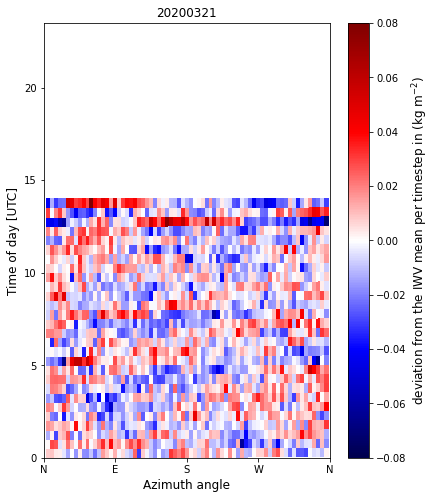

In [291]:
#test for 21.3.20
daily_devmean_scan('/Users/Lennea/Documents/Uni/SHK/Rosa/sups_nya_mwr00_l2_prw_v00_20200321000030.nc')

In [287]:
daily_devmean_scan('/Users/Lennea/Documents/Uni/SHK/Rosa/sups_nya_mwr00_l2_prw_v00_20200519142540.nc')

Exception: Dataset does not include scans

In [14]:
#quicklook scans with percentage
iwv_data = Dataset('/Users/Lennea/Documents/Uni/SHK/Rosa/sups_nya_mwr00_l2_prw_v00_20201001000028.nc')
#iwv_data.variables.keys()
t = np.array(iwv_data['time'])
prw = np.array(iwv_data['prw'])
azi = np.array(iwv_data['azi'])
elevation = np.array(iwv_data['ele'])
prw_offzen = np.array(iwv_data['prw_off_zenith'])

In [15]:
azimuth, time_ofday, airmass_corr = offzen_data(t,azi,prw_offzen,elevation)
iwv_azi_sort, airmass_corr = azi_sort(azimuth, airmass_corr)

<ipython-input-16-fcb3214fa0da>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(iwv_azi_sort,time_ofday,dev_mean_perc[:-2], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
<ipython-input-16-fcb3214fa0da>:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(iwv_azi_sort,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest1,vmax=abs_highest1)


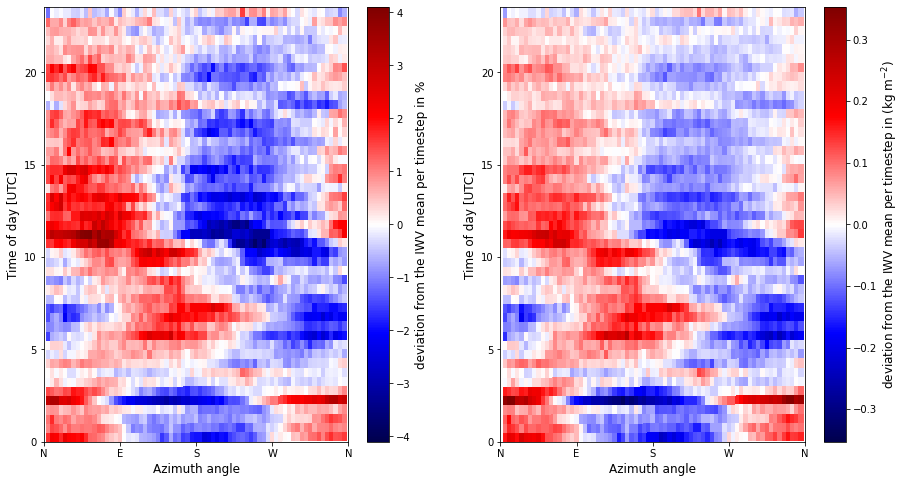

In [16]:
iwv_val_mean = np.nanmean(airmass_corr,axis=1)
iwv_val_mean = np.reshape(iwv_val_mean,(48,1))

iwv_dev_mean = [[]] #gives deviation of iwv values from mean 
for i in range(len(airmass_corr)):
    iwv_dev_mean.append([])
    for j in range(len(airmass_corr[i])):
        iwv_dev_mean[i].append(float(airmass_corr[i][j] - iwv_val_mean[i]))
        
dev_mean_perc = [[]]       
for i in range(len(iwv_dev_mean)):
    dev_mean_perc.append([])
    for j in range(len(iwv_dev_mean[i])):
        dev_mean_perc[i].append(float(iwv_dev_mean[i][j]/iwv_val_mean[i])*100)        

#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(dev_mean_perc)-2):
    max_dev.append(max(dev_mean_perc[i]))
    min_dev.append(min(dev_mean_perc[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
    
max_dev1 = []
min_dev1 = []
for i in range(len(iwv_dev_mean)-2):
    max_dev1.append(max(iwv_dev_mean[i]))
    min_dev1.append(min(iwv_dev_mean[i]))
if abs(np.nanmax(max_dev1)) > abs(np.nanmin(min_dev1)):
    abs_highest1 = abs(np.nanmax(max_dev1))
else:
    abs_highest1 = abs(np.nanmin(min_dev1))    
        


xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']

plt.figure(figsize = (15,8))
plt.subplot(121)
plt.pcolormesh(iwv_azi_sort,time_ofday,dev_mean_perc[:-2], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)           
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [UTC]')
#plt.title('{}'.format(titledate))
plt.rc('axes', labelsize=12) 
#add date on top and in general make fonds bit bigger
plt.colorbar(label=r'deviation from the IWV mean per timestep in %')

plt.subplot(122)
plt.pcolormesh(iwv_azi_sort,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest1,vmax=abs_highest1)
plt.xticks(xticks,xlabels)           
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [UTC]')
#plt.title('{}'.format(titledate))
plt.rc('axes', labelsize=12) 
#add date on top and in general make fonds bit bigger
plt.colorbar(label=r'deviation from the IWV mean per timestep in (kg m$^{-2}$)')

In [320]:
def dev_mean_percent(time_ofday,azimuth,airmass_corr,titledate):
    iwv_val_mean = np.nanmean(airmass_corr,axis=1)
    iwv_val_mean = np.reshape(iwv_val_mean,(48,1))

    iwv_dev_mean = [[]] #gives deviation of iwv values from mean 
    for i in range(len(airmass_corr)):
        iwv_dev_mean.append([])
        for j in range(len(airmass_corr[i])):
            iwv_dev_mean[i].append(float(airmass_corr[i][j] - iwv_val_mean[i]))

    dev_mean_perc = [[]]       
    for i in range(len(iwv_dev_mean)):
        dev_mean_perc.append([])
        for j in range(len(iwv_dev_mean[i])):
            dev_mean_perc[i].append(float(iwv_dev_mean[i][j]/iwv_val_mean[i])*100)        

    #find which is higher, min or max, then make the bigger number vmin and vmax in plot 
    max_dev = []
    min_dev = []
    for i in range(len(dev_mean_perc)-2):
        max_dev.append(max(dev_mean_perc[i]))
        min_dev.append(min(dev_mean_perc[i]))
    if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
        abs_highest = abs(np.nanmax(max_dev))
    else:
        abs_highest = abs(np.nanmin(min_dev))
    #print(abs_highest)        


    xticks = [0,90,180,270,360]
    xlabels = ['N','E', 'S', 'W', 'N']

    plt.figure(figsize=(6.4,8))
    plt.pcolormesh(iwv_azi_sort,time_ofday,dev_mean_perc[:-2], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
    plt.xticks(xticks,xlabels)           
    plt.xlabel('Azimuth angle')
    plt.ylabel('Time of day [UTC]')
    plt.title('{}'.format(titledate))
    plt.rc('axes', labelsize=12) 
    plt.colorbar(label=r'deviation from the IWV mean per timestep in %')

In [8]:
#quicklook scans with percentage
iwv_data = Dataset('/Users/Lennea/Documents/Uni/SHK/Rosa/sups_nya_mwr00_l2_prw_v00_20200109000028.nc')
#iwv_data.variables.keys()
t = np.array(iwv_data['time'])
prw = np.array(iwv_data['prw'])
azi = np.array(iwv_data['azi'])
elevation = np.array(iwv_data['ele'])
prw_offzen = np.array(iwv_data['prw_off_zenith'])

In [9]:
azimuth, time_ofday, airmass_corr = offzen_data(t,azi,prw_offzen,elevation)
iwv_azi_sort, airmass_corr = azi_sort(azimuth, airmass_corr)

In [12]:
dev_mean_percent(time_ofday,iwv_azi_sort,airmass_corr,titledate)

NameError: name 'dev_mean_percent' is not defined

<ipython-input-11-fcb3214fa0da>:1: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-11-fcb3214fa0da>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(iwv_azi_sort,time_ofday,dev_mean_perc[:-2], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
<ipython-input-11-fcb3214fa0da>:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(iwv_azi_sort,time_ofday,iwv_dev_mean[:-1], cmap='seis

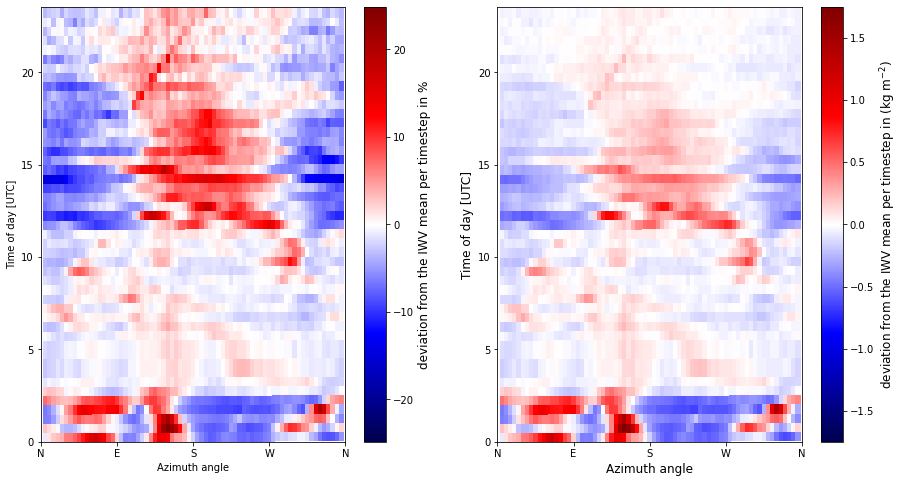

In [11]:
iwv_val_mean = np.nanmean(airmass_corr,axis=1)
iwv_val_mean = np.reshape(iwv_val_mean,(48,1))

iwv_dev_mean = [[]] #gives deviation of iwv values from mean 
for i in range(len(airmass_corr)):
    iwv_dev_mean.append([])
    for j in range(len(airmass_corr[i])):
        iwv_dev_mean[i].append(float(airmass_corr[i][j] - iwv_val_mean[i]))
        
dev_mean_perc = [[]]       
for i in range(len(iwv_dev_mean)):
    dev_mean_perc.append([])
    for j in range(len(iwv_dev_mean[i])):
        dev_mean_perc[i].append(float(iwv_dev_mean[i][j]/iwv_val_mean[i])*100)        

#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(dev_mean_perc)-2):
    max_dev.append(max(dev_mean_perc[i]))
    min_dev.append(min(dev_mean_perc[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
    
max_dev1 = []
min_dev1 = []
for i in range(len(iwv_dev_mean)-2):
    max_dev1.append(max(iwv_dev_mean[i]))
    min_dev1.append(min(iwv_dev_mean[i]))
if abs(np.nanmax(max_dev1)) > abs(np.nanmin(min_dev1)):
    abs_highest1 = abs(np.nanmax(max_dev1))
else:
    abs_highest1 = abs(np.nanmin(min_dev1))    
        


xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']

plt.figure(figsize = (15,8))
plt.subplot(121)
plt.pcolormesh(iwv_azi_sort,time_ofday,dev_mean_perc[:-2], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)           
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [UTC]')
#plt.title('{}'.format(titledate))
plt.rc('axes', labelsize=12) 
#add date on top and in general make fonds bit bigger
plt.colorbar(label=r'deviation from the IWV mean per timestep in %')

plt.subplot(122)
plt.pcolormesh(iwv_azi_sort,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest1,vmax=abs_highest1)
plt.xticks(xticks,xlabels)           
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [UTC]')
#plt.title('{}'.format(titledate))
plt.rc('axes', labelsize=12) 
#add date on top and in general make fonds bit bigger
plt.colorbar(label=r'deviation from the IWV mean per timestep in (kg m$^{-2}$)')

In [17]:
#quicklook scans with percentage
iwv_data = Dataset('/Users/Lennea/Documents/Uni/SHK/Rosa/sups_nya_mwr00_l2_prw_v00_20190903002344.nc')
#iwv_data.variables.keys()
t = np.array(iwv_data['time'])
prw = np.array(iwv_data['prw'])
azi = np.array(iwv_data['azi'])
elevation = np.array(iwv_data['ele'])
prw_offzen = np.array(iwv_data['prw_off_zenith'])

In [25]:
iwv_data.variables.keys()
flag = np.array(iwv_data['flag'])
print(flag)

[8 0 0 ... 0 0 0]


In [18]:
azimuth, time_ofday, airmass_corr = offzen_data(t,azi,prw_offzen,elevation)
iwv_azi_sort, airmass_corr = azi_sort(azimuth, airmass_corr)

<ipython-input-19-fcb3214fa0da>:1: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-19-fcb3214fa0da>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(iwv_azi_sort,time_ofday,dev_mean_perc[:-2], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
<ipython-input-19-fcb3214fa0da>:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(iwv_azi_sort,time_ofday,iwv_dev_mean[:-1], cmap='seis

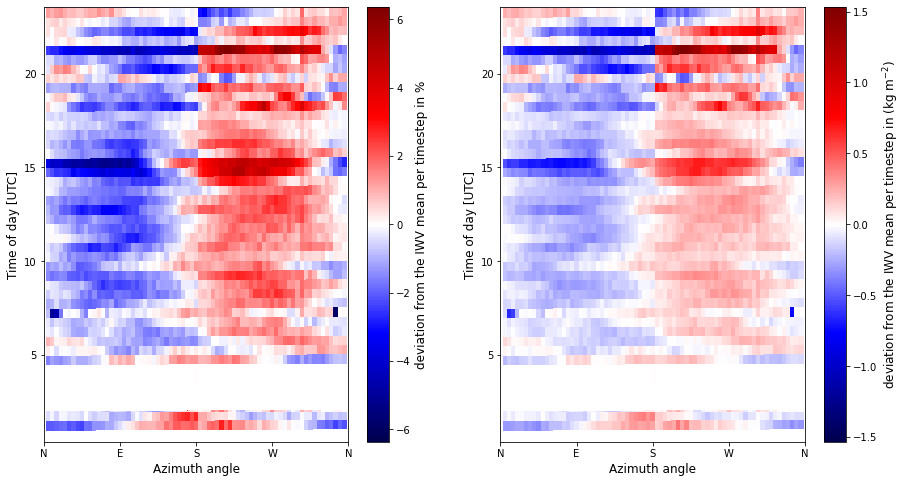

In [19]:
iwv_val_mean = np.nanmean(airmass_corr,axis=1)
iwv_val_mean = np.reshape(iwv_val_mean,(48,1))

iwv_dev_mean = [[]] #gives deviation of iwv values from mean 
for i in range(len(airmass_corr)):
    iwv_dev_mean.append([])
    for j in range(len(airmass_corr[i])):
        iwv_dev_mean[i].append(float(airmass_corr[i][j] - iwv_val_mean[i]))
        
dev_mean_perc = [[]]       
for i in range(len(iwv_dev_mean)):
    dev_mean_perc.append([])
    for j in range(len(iwv_dev_mean[i])):
        dev_mean_perc[i].append(float(iwv_dev_mean[i][j]/iwv_val_mean[i])*100)        

#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(dev_mean_perc)-2):
    max_dev.append(max(dev_mean_perc[i]))
    min_dev.append(min(dev_mean_perc[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
    
max_dev1 = []
min_dev1 = []
for i in range(len(iwv_dev_mean)-2):
    max_dev1.append(max(iwv_dev_mean[i]))
    min_dev1.append(min(iwv_dev_mean[i]))
if abs(np.nanmax(max_dev1)) > abs(np.nanmin(min_dev1)):
    abs_highest1 = abs(np.nanmax(max_dev1))
else:
    abs_highest1 = abs(np.nanmin(min_dev1))    
        


xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']

plt.figure(figsize = (15,8))
plt.subplot(121)
plt.pcolormesh(iwv_azi_sort,time_ofday,dev_mean_perc[:-2], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)           
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [UTC]')
#plt.title('{}'.format(titledate))
plt.rc('axes', labelsize=12) 
#add date on top and in general make fonds bit bigger
plt.colorbar(label=r'deviation from the IWV mean per timestep in %')

plt.subplot(122)
plt.pcolormesh(iwv_azi_sort,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest1,vmax=abs_highest1)
plt.xticks(xticks,xlabels)           
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [UTC]')
#plt.title('{}'.format(titledate))
plt.rc('axes', labelsize=12) 
#add date on top and in general make fonds bit bigger
plt.colorbar(label=r'deviation from the IWV mean per timestep in (kg m$^{-2}$)')

## getting sun position

<ipython-input-6-3d4671b5a319>:16: RuntimeWarning: Mean of empty slice
  iwv_val_mean = np.nanmean(airmass_corr,axis=1)
<ipython-input-6-3d4671b5a319>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(azimuth,time_ofday,iwv_dev_mean[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)


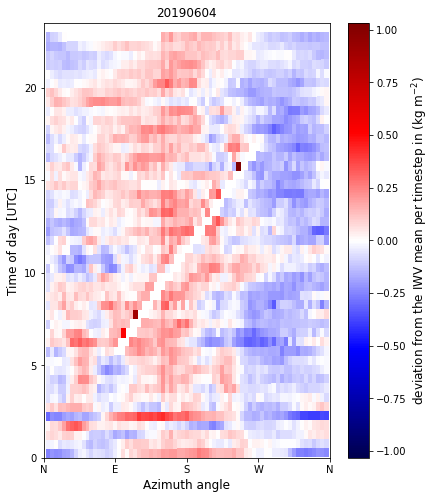

In [45]:
daily_devmean_scan('/Users/lennea/Documents/Uni/SHK/Rosa/sups_nya_mwr00_l2_prw_v00_20190604000028.nc')

In [9]:
#quicklook scans with percentage
iwv_data = Dataset('/Users/Lennea/Documents/Uni/SHK/Rosa/sups_nya_mwr00_l2_prw_v00_20190604000028.nc')
#iwv_data.variables.keys()
t = np.array(iwv_data['time'])
prw = np.array(iwv_data['prw'])
azi = np.array(iwv_data['azi'])
elevation = np.array(iwv_data['ele'])
prw_offzen = np.array(iwv_data['prw_off_zenith'])

In [33]:
iwv_data.variables.keys()
flag = np.array(iwv_data['flag'])
flag[1] = 65
for flagval in flag:
    if flagval != 0: 
        print(flagval)
        print(bin(flagval))
        if flagval & 0b1000000:
            print("Sonnne")
print(prw_offzen.shape)

65
0b1000001
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne
64
0b1000000
Sonnne


0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b100000
32
0b10